<a href="https://colab.research.google.com/github/Nimika19/Mathematics/blob/main/Practice_on_assessment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jacobian Matrix

In [1]:
import numpy as np

def newton(f, s, initial_guess, tolerance=1e-5, max_iteration=1000, damping_factor=0.1, regularization=1e-8):
    x_k = np.array(initial_guess, dtype=float)
    for i in range(max_iteration):
        fx = np.array(f(x_k[0], x_k[1]))
        # Check convergence
        if np.linalg.norm(fx) < tolerance:
            return x_k
        # Calculate Jacobian
        Jac = np.array([[np.gradient(f(x_k[0], x))[0] for x in [x_k[0], x_k[0]+1e-6]],
                         [np.gradient(f(x_k[0], x))[1] for x in [x_k[0], x_k[0]+1e-6]]])
        Jac += np.eye(len(Jac)) * regularization  # Add regularization term
        try:
            spx = np.linalg.solve(Jac, -fx)
        except np.linalg.LinAlgError:
            print(f"Jacobian is singular at iteration {i}. Aborting.")
            return None
        # Apply damping factor
        x_k += damping_factor * spx
    print("Maximum iterations reached without convergence.")
    return None

def f(x1, x2):
    fx1 = x1 + 2*x2 - 2
    fx2 = x1**2 + 4*x2**2 - 4
    return np.array([fx1, fx2])

def s(x1, x2):
    coefficients = np.array([[1, 2], [2*x1, 8*x2]])
    constants = np.array([-f(x1, x2)[0], -f(x1, x2)[1]])
    return np.linalg.solve(coefficients, constants)

initial_guess = [1, 2]
approx_result = newton(f, s, initial_guess)
if approx_result is not None:
    print("Approximate result is:", approx_result)
else:
    print("Newton's method did not converge")

Jacobian is singular at iteration 1. Aborting.
Newton's method did not converge


# Broydean Method

In [2]:
import numpy as np

def broyden(f, initial_guess, tolerance=1e-5, max_iteration=1000):
    x_k = np.array(initial_guess, dtype=float)
    b_k = np.array([[np.gradient(f(x_k[0], x))[0] for x in [x_k[0], x_k[0]+1e-6]],
                     [np.gradient(f(x_k[0], x))[1] for x in [x_k[0], x_k[0]+1e-6]]])
    for i in range(max_iteration):
        fx = np.array(f(x_k[0], x_k[1]))
        # Check convergence
        if np.linalg.norm(fx) < tolerance:
            return x_k
        # Check if Jacobian matrix is singular
        if np.linalg.det(b_k) == 0:
            print("Jacobian matrix is singular. Aborting.")
            return None
        # Solve b_k*delta_x = -f(x_k)
        try:
            delta_x = np.linalg.solve(b_k, -fx)
        except np.linalg.LinAlgError:
            print("Jacobian matrix is singular. Aborting.")
            return None
        x_k2 = x_k + delta_x
        fx2 = np.array(f(x_k2[0], x_k2[1]))
        y_k = fx2 - fx
        s_k = x_k2 - x_k
        b_k = b_k + np.outer((y_k - np.dot(b_k, s_k)), s_k) / np.dot(s_k,s_k)
        x_k = x_k2
    print("Maximum iterations reached without convergence.")
    return None

def f(x1, x2):
    fx1 = x1 + 2*x2 - 2
    fx2 = x1**2 + 4*x2**2 - 4
    return np.array([fx1, fx2])

initial_guess = [1,2]
approx_result = broyden(f, initial_guess)
if approx_result is not None:
    print("Approximate result is:", approx_result)
else:
    print("Broyden's method did not converge")

Jacobian matrix is singular. Aborting.
Broyden's method did not converge


# Interpolation

In [3]:
import numpy as np

# Define the time and speed data
time = np.array([0, 10, 20, 30, 40])
speed = np.array([0, 15, 30, 45, 60])

# Define the timestamps for which we want to estimate the speed
timestamps = np.array([5, 25, 35])

# Perform linear interpolation
speed_interp = np.interp(timestamps, time, speed)

print("Estimated speed at 5 seconds:", speed_interp[0])
print("Estimated speed at 25 seconds:", speed_interp[1])
print("Estimated speed at 35 seconds:", speed_interp[2])

Estimated speed at 5 seconds: 7.5
Estimated speed at 25 seconds: 37.5
Estimated speed at 35 seconds: 52.5


# Euler Method

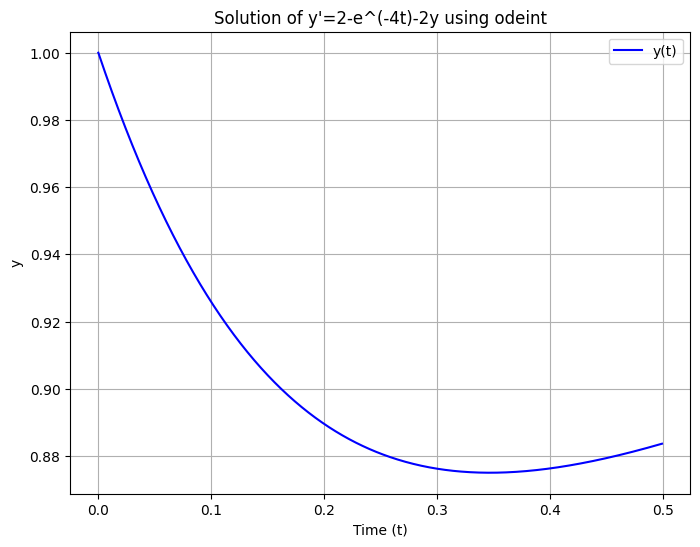

[[1.        ]
 [0.99900299]
 [0.99801196]
 [0.99702687]
 [0.99604769]
 [0.99507441]
 [0.994107  ]
 [0.99314543]
 [0.99218967]
 [0.99123968]
 [0.99029543]
 [0.98935691]
 [0.98842409]
 [0.98749694]
 [0.98657543]
 [0.98565955]
 [0.98474926]
 [0.98384453]
 [0.98294535]
 [0.98205168]
 [0.9811635 ]
 [0.98028079]
 [0.97940351]
 [0.97853165]
 [0.97766517]
 [0.97680405]
 [0.97594827]
 [0.9750978 ]
 [0.97425262]
 [0.97341269]
 [0.97257801]
 [0.97174853]
 [0.97092425]
 [0.97010512]
 [0.96929113]
 [0.96848226]
 [0.96767848]
 [0.96687977]
 [0.96608609]
 [0.96529744]
 [0.96451377]
 [0.96373508]
 [0.96296134]
 [0.96219252]
 [0.9614286 ]
 [0.96066956]
 [0.95991537]
 [0.95916602]
 [0.95842147]
 [0.95768171]
 [0.95694671]
 [0.95621645]
 [0.95549091]
 [0.95477007]
 [0.9540539 ]
 [0.95334237]
 [0.95263548]
 [0.95193319]
 [0.95123549]
 [0.95054235]
 [0.94985375]
 [0.94916967]
 [0.94849009]
 [0.94781499]
 [0.94714434]
 [0.94647812]
 [0.94581631]
 [0.9451589 ]
 [0.94450585]
 [0.94385716]
 [0.94321279]
 [0.94

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the differential equation
def dydt(y, t):
    return 2 - np.exp(-4 * t) - 2 * y

# Define the initial condition
y0 = 1

# Define the time span
t_span = [0, 0.5]

# Initialize the time array
t = np.arange(t_span[0], t_span[1], 0.001)

# Integrate the differential equation
y = odeint(dydt, y0, t)

# Plot the solution
plt.figure(figsize=(8, 6))
plt.plot(t, y, 'b-', label='y(t)')
plt.xlabel('Time (t)')
plt.ylabel('y')
plt.title('Solution of y\'=2-e^(-4t)-2y using odeint')
plt.grid(True)
plt.legend()
plt.show()

print(y)

# Differentation

Find the derivative of the function f(x) = 3x^2 sin(x) using Python.

Derivative of f(x) = 3x^2 sin(x) is given by:

f'(x) = d(3x^2 sin(x))/dx = 3x^2 cos(x) + 6x sin(x)

In [6]:
import numpy as np

def f(x):
    return 3*x**2 * np.sin(x)

x = 1.0  # given value of x
h = 1e-7  # step size for numerical differentiation

f_prime = (f(x+h) - f(x-h)) / (2*h)

print("The derivative of f(x) = 3x^2 sin(x) at x =", x, "is", f_prime)

The derivative of f(x) = 3x^2 sin(x) at x = 1.0 is 6.669732826036778


In [8]:
# Find the derivative of the function f(x) = (2x+1)/(x+1) using Python.

from sympy import symbols, diff

x = symbols('x')
f = (2*x+1)/(x+1)
f_prime = diff(f, x)

import numpy as np

def f(x):
    return (2*x+1)/(x+1)

x = 1.0  # given value of x
h = 1e-7  # step size for numerical differentiation

f_prime = (f(x+h) - f(x-h)) / (2*h)

print("The derivative of f(x) = (2x+1)/(x+1) at x =", x, "is", f_prime)


The derivative of f(x) = (2x+1)/(x+1) at x = 1.0 is 0.24999999848063226


# Integration


In [9]:
# Find the definite integral of the function f(x) = x^2 sin(x) from x = 0 to x = π using Python.

# Sample of Starting
from scipy import integrate
import numpy as np

def f(x):
    return x**2 * np.sin(x)

result, error = integrate.quad(f, 0, np.pi)

print("The definite integral of f(x) = x^2 sin(x) from x = 0 to x = π is", result)

# Python Code
from scipy.integrate import odeint
import numpy as np

def f(y, x):
    return x**2 * np.sin(x)

y0 = 0
x = np.linspace(0, np.pi, 100)

result = odeint(f, y0, x)

print("The definite integral of f(x) = x^2 sin(x) from x = 0 to x = π is", result[-1])

The definite integral of f(x) = x^2 sin(x) from x = 0 to x = π is 5.869604401089359
The definite integral of f(x) = x^2 sin(x) from x = 0 to x = π is [5.86960406]


In [10]:
# Find the area under the curve y = x^3 - 3x^2 + 2x from x = 0 to x = 2 using Python.
from scipy import integrate
import numpy as np

def f(x):
    return x**3 - 3*x**2 + 2*x

result, error = integrate.quad(f, 0, 2)

print("The area under the curve y = x^3 - 3x^2 + 2x from x = 0 to x = 2 is", result)

The area under the curve y = x^3 - 3x^2 + 2x from x = 0 to x = 2 is -3.378919908847778e-16


In [11]:
# Another method
from scipy import integrate
import numpy as np

def f(x):
    return x**3 - 3*x**2 + 2*x

result = integrate.romberg(f, 0, 2)

print("The area under the curve y = x^3 - 3x^2 + 2x from x = 0 to x = 2 is", result)


The area under the curve y = x^3 - 3x^2 + 2x from x = 0 to x = 2 is 0.0


<ipython-input-11-d88611627d03>:8: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  result = integrate.romberg(f, 0, 2)
